# Benito Priyasha A.
# 0706022210021

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


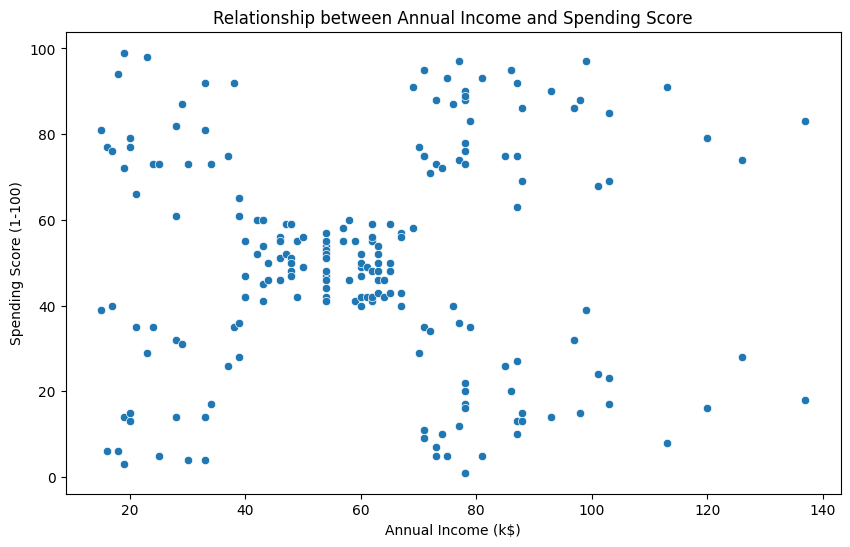

In [6]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Kode di atas membuat visualisasi scatter plot untuk melihat hubungan antara pendapatan tahunan
# dan skor pengeluaran pelanggan. Setiap titik pada plot mewakili seorang pelanggan,
# dengan pendapatan pada sumbu x dan skor pengeluaran pada sumbu y. Visualisasi ini membantu dalam
# mengidentifikasi tren dan pola perilaku pengeluaran pelanggan.

In [7]:
# make an insightful visualization and explain


## Data Preprocessing

For this case study, we only use income and spending score

In [8]:
# create new dataframe that consist only annual income and spending score
new_df = df[['AnnualIncome', 'SpendingScore']]
new_df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [9]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_data, columns=['income', 'spending'])
scaled_df.head()

,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [10]:
# get stastical information on the new dataset

scaled_df.describe()

,income,spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

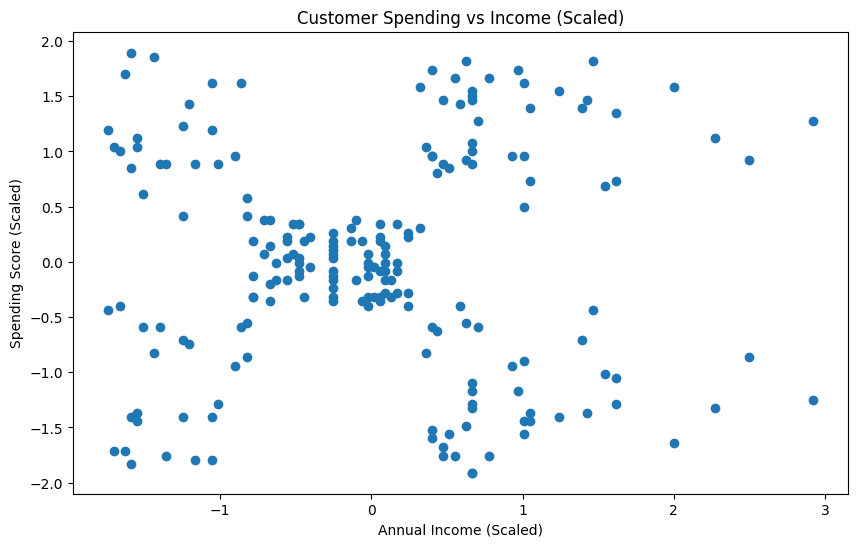

In [11]:
# Visualize the position
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df['income'], scaled_df['spending'])
plt.title('Customer Spending vs Income (Scaled)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

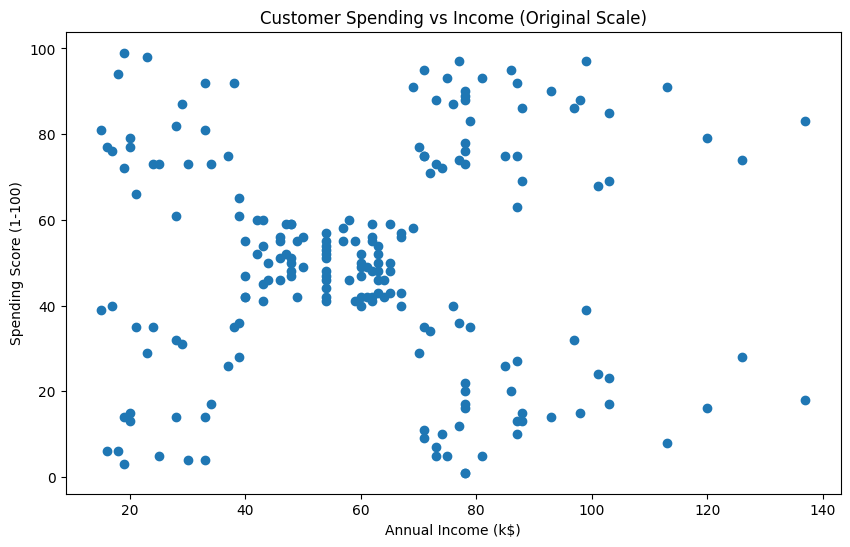

In [12]:
# Visualize the position using the original scale
plt.figure(figsize=(10, 6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.title('Customer Spending vs Income (Original Scale)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [13]:
# set the parameter for evaluating K

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

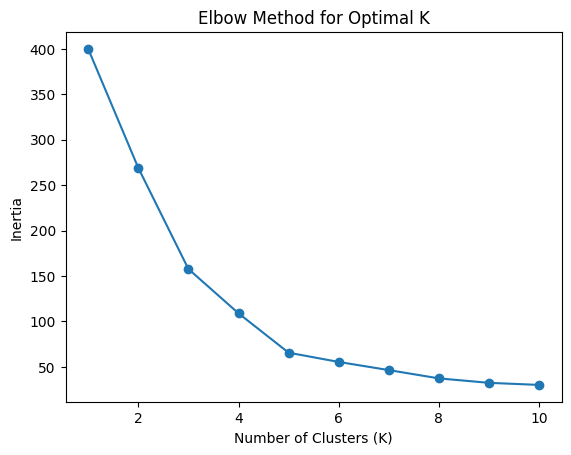

In [14]:
# manually visualize the elbow method using plotlib
# Plotting the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [15]:
# using kneelocator to find the elbow/knee
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
print(f"Optimal K (Elbow Point): {kl.elbow}")

Optimal K (Elbow Point): 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [16]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_
cluster_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

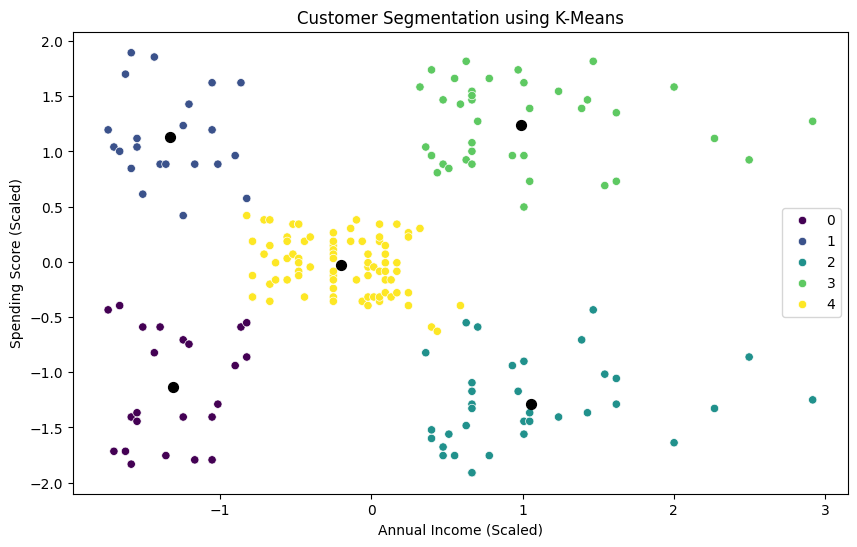

In [17]:
# visualize the result using scater chart
# Add cluster labels to the DataFrame
scaled_df['cluster'] = cluster_labels

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='spending', hue='cluster', data=scaled_df, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=200, color='Black')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

In [18]:
# Inverse transform the scaled data to get the original values
original_data_with_clusters = pd.DataFrame(scaler.inverse_transform(scaled_df[['income', 'spending']]), columns=['AnnualIncome', 'SpendingScore'])
original_data_with_clusters['Cluster'] = scaled_df['cluster']
original_data_with_clusters.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [19]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = original_data_with_clusters.groupby('Cluster').agg(
    {'SpendingScore': ['mean', 'std', 'min', 'max'],
     'AnnualIncome': ['mean', 'std', 'min', 'max']}
)

cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
Cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
Cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>